<a href="https://colab.research.google.com/github/nayun12/RL-by-Pytorch/blob/main/1%ED%9A%8C%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch 예제
- 목표 : Pytorch를 이용해 간단한 네트워크 연산을 수행!
- ANN 네트워크 구조
    - 3개의 입력(랜덤), 2개의 출력
    - 은닉층 2층 (4개의 노드)
- CNN 네트워크 구조
    - 2층의 convolution, 1층의 linear layer
    - convolution : Channel=32,Filter=3x3, Stride=2x2

In [2]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

# gpu가 있는 경우 pytorch 연산을 gpu로, 그렇지 않은 경우 pytorch 연산을 cpu로 수행
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [3]:
# 딥러닝 모델
class Model(nn.Module):
    # init function : 네트워크 변수 정의
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(3,4)
        self.fc2 = nn.Linear(4,4)
        self.fc3 = nn.Linear(4,2)
    # forward 함수 : 네트워크 구조 결정 및 연산 수행
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x        
        

nn.Linear : 선형 연산 (Wx+b)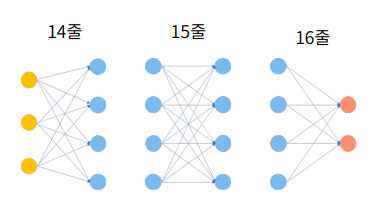

In [4]:
# 네트워크 선언
model = Model().to(device)

# 네트워크를 이용한 연산 수행 (tensor)
# 입력데이터 생성 - (2,3)의 랜덤 데이터를 torch.rand로 생성 후 연산 장치 할당(tensor 자료형)
# tensor : pytorch 연산 수행을 위한 데이터 자료형 (numpy<->tensor 변환 중요)
x_tensor = torch.rand(2,3).to(device)
# 딥러닝 모델(model)에 입력 x를 대입하여 결과값(output) 도출 -> model의 forward 함수 연산
output = model(x_tensor)

print("x_tensor: {}".format(x_tensor))
print("output: {}".format(output))

x_tensor: tensor([[0.8041, 0.7335, 0.3528],
        [0.1415, 0.2065, 0.0718]])
output: tensor([[-0.1705, -0.5964],
        [-0.1668, -0.5867]], grad_fn=<AddmmBackward0>)


In [5]:
# Numpy 변환
# 연산장치를 cpu로 변환
# detach : gradient 전파가 안되도록 함
# numpy : tensor를 numpy로 변환 
output_np = output.cpu().detach().numpy()
print("output_np : {}".format(output_np))


output_np : [[-0.17049286 -0.5964496 ]
 [-0.16675484 -0.5866587 ]]
